In [3]:
import matplotlib.pyplot as plt
% matplotlib inline

In [20]:
import numpy as np


class LinearRegression(object):
    """Multivariate linear regression model using gradient descent"""

    def __init__(self):
        pass

    def train(self, x, y, epochs=10, learning_rate=0.0001, optimizer='momentum'):

        self.theta_array = np.zeros(np.array(x.ndim)+1)

        x = self._add_bias(x)
        
        self.loss = []
        self.theta = []
        self.avg_minibatch_partial_grads = []
        
        for _ in range(1, epochs):
            loss = self._avg_minibatch_loss(x, self.theta_array, y)
            print('loss: ', loss)
            print("theta: {}".format(self.theta_array))
            self.loss.append(loss)
            self.theta.append(self.theta_array)
            avg_minibatch_partial_grads = np.average(
                                      (x.transpose().dot(self.theta_array) - y) * x, axis=1)
            print('x.transpose().dot(self.theta_array) - y): {}'
                  .format(x.transpose().dot(self.theta_array) - y))
            print('x: {}'.format(x))
            print('y: {}'.format(y))
            print('avg minibatch_partial_grads: {}'.format(avg_minibatch_partial_grads))
            self.avg_minibatch_partial_grads.append(avg_minibatch_partial_grads)
            self.theta_array -= learning_rate * avg_minibatch_partial_grads
            plt.scatter(x[0], y)
            plt.plot()

    def validate(self, x, y):
        self._check_theta_exists('validating')

        x = self._add_bias(x)

        predicted_y = np.dot(x.transpose(), self.theta_array)
        rmse = np.sqrt(np.average(np.square(y- predicted_y))) # Root Mean Square Error (RMSE)
        return predicted_y, rmse

    def predict(self, x):
        self._check_theta_exists('predicting')

        x = self._add_bias(x)

        predicted_y = np.dot(x.transpose(), self.theta_array)
        return predicted_y

    def _add_bias(self, x):
        if x.ndim == 1:
             x = np.row_stack((x, np.ones(len(x))))
        else:
             x = np.row_stack((x, np.ones(len(x[0]))))
        return x
    
    def _avg_minibatch_loss(self, x, theta_array, y):
        # RMSE
        avg_minibatch_loss = np.sqrt(
                 np.average(
                 np.square(
                 x.transpose().dot(theta_array) - y)))
        return avg_minibatch_loss
    
    def _check_theta_exists(self, phrase):
        assert hasattr(self, 'theta_array'), ("ValueError: theta is not defined. "
            "Please make sure to train the model before {}}.".format(phrase))


In [21]:
linear_regression = LinearRegression()

In [40]:
x = np.array(np.arange(10))
delta = np.random.uniform(0,10, size=(10,))
y = (.4 * x +1 + delta)

loss:  7.598079931582751
theta: [0. 0.]
x.transpose().dot(self.theta_array) - y): [ -3.88561803  -1.61031559  -2.63336094  -6.34544258  -5.36224123
  -9.31624631  -7.61817977 -12.53985999 -12.59983614  -4.77819134]
x: [[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
y: [ 3.88561803  1.61031559  2.63336094  6.34544258  5.36224123  9.31624631
  7.61817977 12.53985999 12.59983614  4.77819134]
avg minibatch_partial_grads: [-37.12340715  -6.66892919]
loss:  196.88149114685567
theta: [37.12340715  6.66892919]
x.transpose().dot(self.theta_array) - y): [  2.78331116  42.18202075  78.28238254 111.69370805 149.80031655
 182.96971861 221.7911923  253.99291923 291.05635023 336.00140217]
x: [[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
y: [ 3.88561803  1.61031559  2.63336094  6.34544258  5.36224123  9.31624631
  7.61817977 12.53985999 12.59983614  4.77819134]
avg minibatch_partial_grads: [1050.90387789  167.05533216]
loss:  5554.9490690973535
theta: [-1013.780

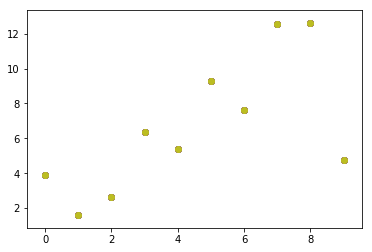

In [41]:
linear_regression.train(x, y, epochs=10, learning_rate=1)

In [8]:
linear_regression.train(x, y, epochs=15, learning_rate=0.001)

loss:  6.21487061865213
theta: [0. 0.]
x.transpose().dot(self.theta_array) - y): [  2.3219093   -5.00102083   3.40714857  -4.62773213   1.07149006
   0.85400819  -3.37984975  -8.97937186  -5.31727855 -14.1639244 ]
x: [[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
y: [-2.3219093   5.00102083 -3.40714857  4.62773213 -1.07149006 -0.85400819
  3.37984975  8.97937186  5.31727855 14.1639244 ]
avg minibatch_partial_grads: [-25.66621684  -3.38146214]
loss:  6.107684168933176
theta: [0.02566622 0.00338146]
x.transpose().dot(self.theta_array) - y): [  2.32529077  -4.97197315   3.46186246  -4.54735201   1.17753639
   0.98572074  -3.22247099  -8.79632688  -5.10856735 -13.92954699]
x: [[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
y: [-2.3219093   5.00102083 -3.40714857  4.62773213 -1.07149006 -0.85400819
  3.37984975  8.97937186  5.31727855 14.1639244 ]
avg minibatch_partial_grads: [-24.91951308  -3.2625827 ]
loss:  6.00491407968314
theta: [0.05058573 0.0066

In [9]:
linear_regression.train(x, y, epochs=20, learning_rate=0.01)

loss:  6.21487061865213
theta: [0. 0.]
x.transpose().dot(self.theta_array) - y): [  2.3219093   -5.00102083   3.40714857  -4.62773213   1.07149006
   0.85400819  -3.37984975  -8.97937186  -5.31727855 -14.1639244 ]
x: [[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
y: [-2.3219093   5.00102083 -3.40714857  4.62773213 -1.07149006 -0.85400819
  3.37984975  8.97937186  5.31727855 14.1639244 ]
avg minibatch_partial_grads: [-25.66621684  -3.38146214]
loss:  5.213208420771499
theta: [0.25666217 0.03381462]
x.transpose().dot(self.theta_array) - y): [  2.35572393  -4.71054404   3.95428753  -3.823931     2.13195335
   2.17113366  -1.80606212  -7.14892206  -3.23016658 -11.82015027]
x: [[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
y: [-2.3219093   5.00102083 -3.40714857  4.62773213 -1.07149006 -0.85400819
  3.37984975  8.97937186  5.31727855 14.1639244 ]
avg minibatch_partial_grads: [-18.19917924  -2.19266776]
loss:  4.630067776116486
theta: [0.43865396 0.055

[array([-25.66621684,  -3.38146214]), array([-18.19917924,  -2.19266776]), array([-12.91374311,  -1.35177802]), array([-9.17249631, -0.7571418 ]), array([-6.52426348, -0.33680804]), array([-4.64969203, -0.03984811]), array([-3.32273664,  0.16978651]), array([-2.38339709,  0.3176118 ]), array([-1.71842145,  0.42168855]), array([-1.24764732,  0.49480063]), array([-0.91433386,  0.54599675]), array([-0.67831857,  0.58168181]), array([-0.51117346,  0.60638933]), array([-0.39277654,  0.62332824]), array([-0.308885 ,  0.6347699]), array([-0.24941742,  0.64232203]), array([-0.20723795,  0.64712259]), array([-0.17729565,  0.64997707]), array([-0.15601536,  0.6514556 ])]


TypeError: scatter() missing 1 required positional argument: 'y'

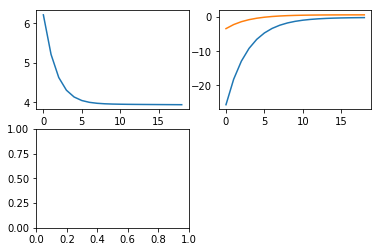

In [11]:
print((linear_regression.avg_minibatch_partial_grads))

fig = plt.figure()

plt.subplot(2, 2, 1)
plt.plot(linear_regression.loss)

plt.subplot(2, 2, 2)
plt.plot(np.array(linear_regression.avg_minibatch_partial_grads))

plt.subplot(2, 2, 3)
plt.scatter(np.array(linear_regression.theta))

plt.show()


In [21]:
y_predicted = linear_regression.predict(x)

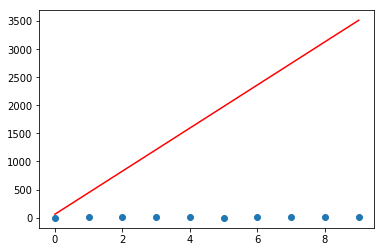

In [22]:
import matplotlib.pyplot as plt
% matplotlib inline

plt.scatter(x, y)
plt.plot(x, y_predicted, color='red')
plt.show()